# 无监督学习——聚类

**预处理**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

os.environ['OMP_NUM_THREADS'] = '6'


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## K-Means K均值聚类

In [4]:
# 生成数据簇
from sklearn.datasets import make_blobs

# 定义五个聚类中心的坐标
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# 定义五个聚类的标准差，确定每个聚类中数据点的分散程度 
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 使用make_blobs函数生成模拟数据  
# n_samples=2000 表示生成2000个样本点  
# centers=blob_centers 表示使用上面定义的blob_centers作为聚类中心  
# cluster_std=blob_std 表示每个聚类的标准差使用上面定义的blob_std  
# random_state=7 用于设置随机数生成器的种子，确保每次运行代码时生成的数据一致  
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [5]:
# 绘图函数
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

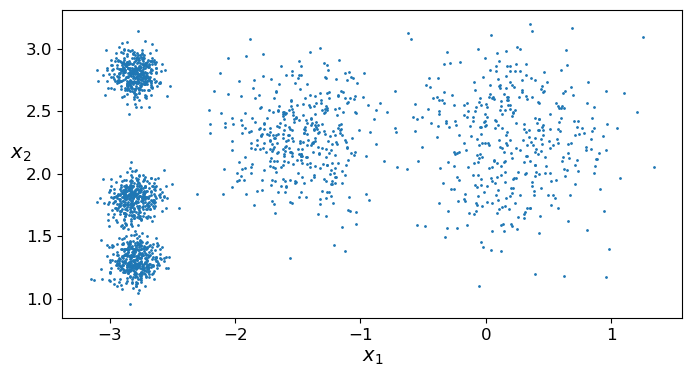

In [6]:
# 绘图
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

**训练和预测**

In [7]:
# 训练K均值聚类器
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X) # y_pred是每个数据点对应的聚类标签数组（取值从0到k-1） 

每个实例都被分到一个簇里

In [8]:
y_pred

array([2, 2, 4, ..., 1, 4, 2])

5个聚类中心

In [9]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

样本标签

In [10]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2])

预测新样本的标签

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1])

**决策边界**

In [12]:
# 绘制数据点
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 绘制聚类中心
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

# 绘制决策边界
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

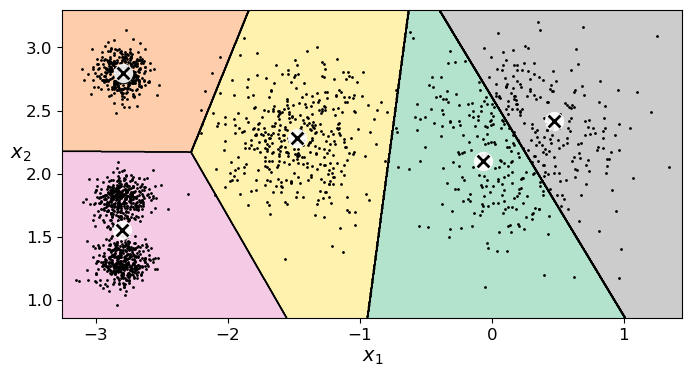

In [13]:
# 绘图
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

**硬聚类与软聚类**

`transform()` 方法用于测量每个实例到所有质心的距离

In [14]:
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

可以验证一下`transform()`方法测量的是否为实例到聚类中心的欧式距离

In [15]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

### K均值算法

`KMeans`类默认使用优化后的算法，为了观察学习K均值算法，需要通过设置参数`init="random"`, `n_init=1`

In [16]:
# init="random"：初始化质心时采用随机方法 
# n_init=1：只进行一次质心初始化
# max_iter 最大迭代次数
# random_state=1：设置随机种子为1，确保每次运行的结果一致  
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

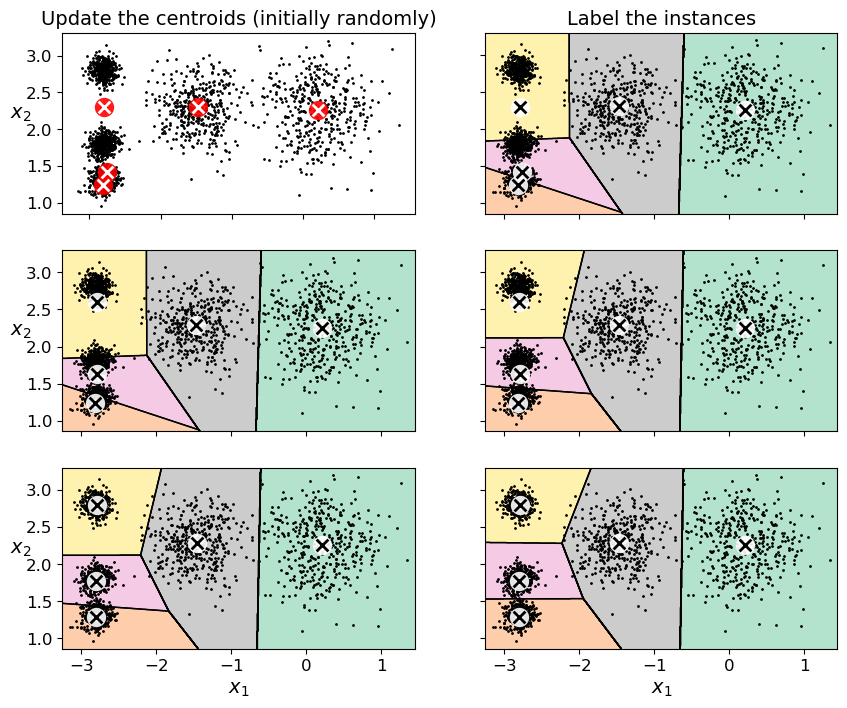

In [17]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)


plt.show()

**K均值算法的易变性**

经典K-Means算法中，聚类中心被随机初始化，然后算法通过迭代来逐步优化这些聚类中心。然而，这种方法的一个主要问题是，如果多次运行K-Means（或使用不同的随机种子），它可能会收敛到非常不同的解

In [18]:
# 聚类器比较绘图
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

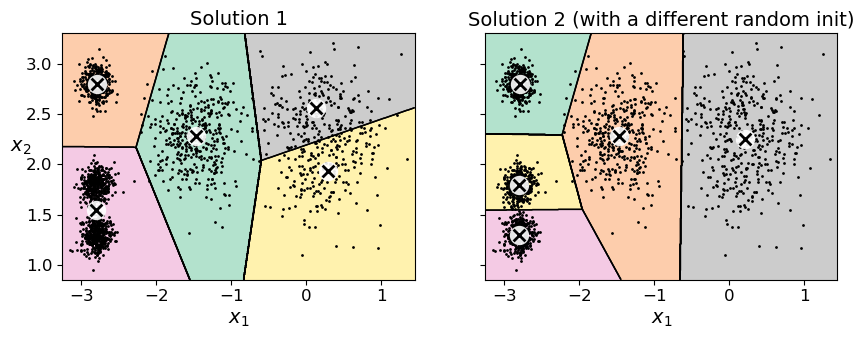

In [19]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=3)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

### Inertia —— 类内距离平方和

为了选择最佳模型，我们需要一种方法来评估K-Means模型的性能。我们可以测量每个实例与其质心之间的距离。这就是 _inertia_ 

In [20]:
kmeans.inertia_

224.07433122515724

我们能验证 inertia 就是训练实例与其聚类中心的距离平方和

In [21]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

224.07433122515636

`score()` 方法返回的是负的inertia，因为`score()`方法必须始终遵循**“越大越好”**的规则

In [22]:
kmeans.score(X)

-224.07433122515724

### 多次初始化

解决K-means解的易变性问题的一个方法是简单地多次运行K-Means算法，每次使用不同的随机初始化，并选择使inertia最小化的解决方案。

In [23]:
kmeans_rnd_init1.inertia_

219.58201503602282

In [24]:
kmeans_rnd_init2.inertia_

211.5985372581684

当你设置n_init超参数时，Scikit-Learn会运行原始算法n_init次，并选择使 inertia 最小化的解决方案。
默认情况下，Scikit-Learn设置n_init为'auto'

当n_init='auto'时，运行的次数取决于init的值：如果使用init='random'或可调用对象，则运行10次；如果使用init='k-means++'或init是类似数组的形式，则运行1次。

In [25]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

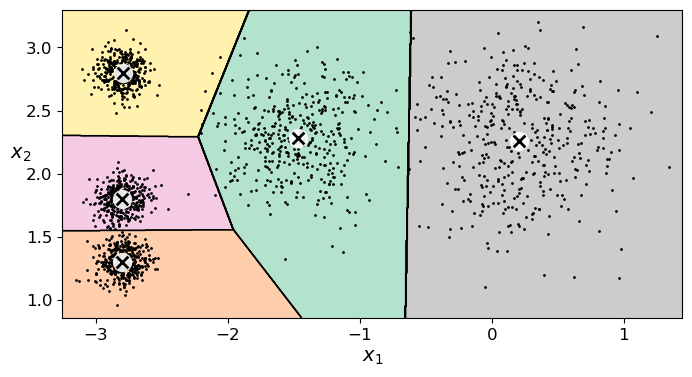

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [27]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

### 寻找最佳聚类数

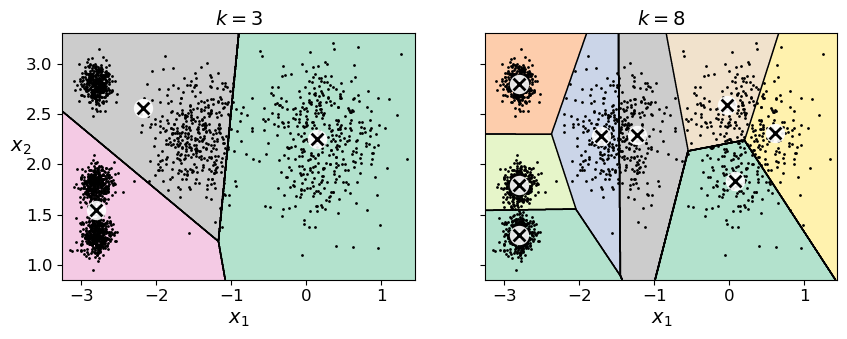

In [35]:
kmeans_k3 = KMeans(n_clusters=3, random_state=2)
kmeans_k8 = KMeans(n_clusters=8, random_state=2)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

In [36]:
kmeans_k3.inertia_

653.2167190021552

In [37]:
kmeans_k8.inertia_

119.18123977914514

我们不能简单地取使 inertia 最小的k值，因为随着我们增加k值，inertia 会持续降低。实际上，聚类的数量越多，每个实例离其最近的质心就越近，因此 inertia 就越低。

我们可以绘制 inertia 随k值变化的曲线，并分析得到的曲线

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=2).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

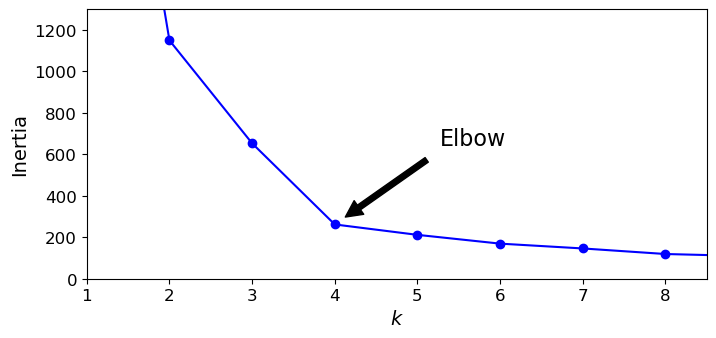

In [39]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

在k=4时有一个拐点，这意味着比这个数量少的聚类会不好，而更多的聚类并不会带来太多帮助，并且可能会将聚类一分为二。因此，k=4是一个相当好的选择。当然，在这个例子中它并不完美，因为它意味着左下角的两个聚类会被视为一个聚类，但它是一个较好的聚类结果。

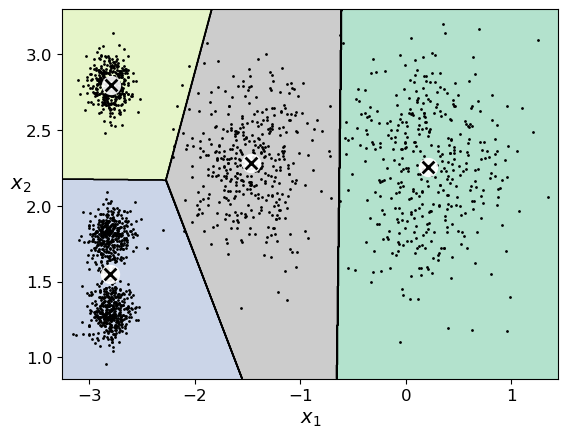

In [40]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()